In [1]:
import sys
sys.path.insert(1,'/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code')
import ite
import numpy as np
import math
import matplotlib.pyplot as plt
# %matplotlib notebook

# TODO 1
Using the ITE toolbox, design and implement a procedure that starting
from an arbitrarily long list of independent realizations for a continuous
random variable x provides an estimate of the differential entropy of x,
h(x).

Note that your procedure should not assume any prior information on
the statistics of x.

Moreover, ITE could provide different types of
estimators for a given metric. Therefore, (when possible) consider the
different allowed approaches.

In [2]:
print(ite.cost.BHShannon_KnnK())
print(ite.cost.BHShannon_SpacingV())
print(ite.cost.BHShannon_MaxEnt1())
print(ite.cost.BHShannon_MaxEnt2())
print(ite.cost.MHShannon_DKLN())
print(ite.cost.MHShannon_DKLU())

BHShannon_KnnK -> {'mult': True, 'knn_method': 'cKDTree', 'k': 3, 'eps': 0}
BHShannon_SpacingV -> {'mult': True}
BHShannon_MaxEnt1 -> {'mult': True}
BHShannon_MaxEnt2 -> {'mult': True}
MHShannon_DKLN -> {'mult': True, 'kl_co': <ite.cost.base_d.BDKL_KnnK object at 0x7f78b3ef9490>}
MHShannon_DKLU -> {'mult': True, 'kl_co': <ite.cost.base_d.BDKL_KnnK object at 0x7f78b3ef9490>}


In [3]:
def diff_h(x):
    '''
    Estimation of the differential entropy using ite.
    The code is based on the examples of the documentation.
    Be carefull that all the estimations are done in [nat].
    '''
    # Base Estimators (estimator not based on other estimated quantities)
    co1 = ite.cost.BHShannon_KnnK(mult=False, eps=0.1) # Estimator #1: k-nearest neighbours
    co2 = ite.cost.BHShannon_SpacingV(mult=False) # Estimator #2: approximate slope of the inverse distribution function
    co3 = ite.cost.BHShannon_MaxEnt1(mult=False) # Estimator #3: maximum entropy distribution, function set1, plug-in
    co4 = ite.cost.BHShannon_MaxEnt2(mult=False) # Estimator #4: maximum entropy distribution, function set2, plug-in
    # Meta Estimators (based on other estimated quantities)
    co5 = ite.cost.MHShannon_DKLN(mult=False) # Estimator #5: -KL divergence from the normal distribution
    co6 = ite.cost.MHShannon_DKLU(mult=False) # Estimator #6: -KL divergence from the uniform distribution
    
    # Base Estimations
    h1 = co1.estimation(x) # Estimation with estimator #1.
    h2 = co2.estimation(x) # Estimation with estimator #2.
    h3 = co3.estimation(x) # Estimation with estimator #3.
    h4 = co4.estimation(x) # Estimation with estimator #4.
    # Meta Estimations
    h5 = co5.estimation(x) # Estimation with estimator #5.
    h6 = co6.estimation(x) # Estimation with estimator #6.
    
    return h1, h2, h3, h4, h5, h6

# TODO 2
Test your procedure from 1. by generating a list of independent
samples from the following distributions:

+ A Gaussian distribution with mean $m_x = 0$ and variance $\sigma_x^2=P$.
+ An Exponential distribution with \lambda, i.e., $p_x(a) = \lambda e^{-\lambda a}1(a)$.

Compare the results obtained by employing different estimation
approaches. Furthermore, compare the obtained estimates to those
you obtained and discussed in Homework 2 discussing the reliability of
ITE estimators.

In [4]:
# FUNCTIONS FROM THE LAST HOMEWORK TO PERFORM THE ESTIMATIONS

def pdf(x : np.ndarray, width : float) -> tuple:
    '''
    Function that estimates the pdf of a vector x, using an histogram with bins of
    width specified by the corresponding argument.
    The function returns a tuple containing hist and bin_edges (see np.histogram).
    If plot=True the function also plots the pdf histogram.
    '''
    x_min = x.min() # Min value taken by x
    x_max = x.max() # Max value taken by x
    # Create vector of bin_edges
    bin_edges = np.arange(x_min, x_max+0.01, step=width)
    hist, bin_edges = np.histogram(x, bins=bin_edges, density=True)
    
    return hist, bin_edges

def diff_info(x : np.ndarray, width : float) -> np.ndarray:
    '''
    Function that estimates the differential information function of the continous r.v. x.
    Since we are working with empirical discrete vectors.
    '''
    # Compute pdf
    hist, _ = pdf(x, width)
    hist = np.array(hist[hist != 0]) # Drop probs = 0, which would deform the result.
    diff_info = np.log2(1/hist)
    return diff_info

def my_diff_entropy(x, width, plot=False, num_bins=False) -> float:
    '''
    Function that computes the differential entropy, using the quantities computed above.
    Note that the final result must be normalized (*width).
    '''
    hist, bin_edges = pdf(x, width)
    # optional plot part
    if plot == True:
        plt.hist(x, bin_edges, density=True)
        plt.plot(bin_edges[:-1]+width/2,hist, color='r') # Note I shifted bin_edges in order to make the red line pass through the center of each bin
    hist = np.array(hist[hist != 0])
    diff_i = diff_info(x, width)
    
    # Now the diff entropy is given as an inner product between px and diff_i
    diff_entropy = np.inner(hist, diff_i) * width
    # Convert in nats to be consisten with ite
    diff_entropy = diff_entropy * np.log(2)

    
    if num_bins == True:
        return diff_entropy, len(hist)
    
    return diff_entropy

In [5]:
# FUNCTIONS TO GENERATE RANDOM VECTORS

def gen_norm(var:float, L:int):
    x = np.random.normal(0, var, (L,1))
    return x

def gen_exp(lam:float, L:int):
    beta = 1/lam
    x = np.random.exponential(beta, (L,1))
    return x

In [6]:
# FUNCTIONS TO ESTIMATE THE TRUE VALUES FOR THE DISTRIBUTIONS

def true_diff_norm(var:float):
    hx = np.log(var*np.sqrt(2*math.pi*math.e))
    return hx

def true_diff_exp(lam:float):
    nat = 1 - np.log(lam)
    return nat

## Estimations for a Gaussian Distribution

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

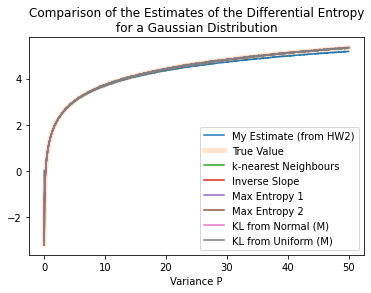

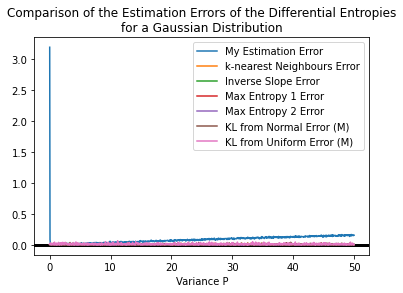

In [7]:
# VARYING THE VARIANCE

P_grid = np.linspace(0.01,50,1000)
L = 10000
width = 0.1

my_list = []
true_list = []
l1,l2,l3,l4,l5,l6 = [],[],[],[],[],[]

my_e = []
e1,e2,e3,e4,e5,e6 = [],[],[],[],[],[]

for p in P_grid:
    x = gen_norm(p, L)
    print(type(x))
    
    my_h = my_diff_entropy(x, width, plot=False, num_bins=False) # My estimation from HW2
    true_h = true_diff_norm(p)
    h1,h2,h3,h4,h5,h6 = diff_h(x) # ite Estimations
    
    my_list.append(my_h)
    true_list.append(true_h)
    l1.append(h1)
    l2.append(h2)
    l3.append(h3)
    l4.append(h4)
    l5.append(h5)
    l6.append(h6)
    
    my_e.append(np.absolute(my_h-true_h))
    e1.append(np.absolute(h1-true_h))
    e2.append(np.absolute(h2-true_h))
    e3.append(np.absolute(h3-true_h))
    e4.append(np.absolute(h4-true_h))
    e5.append(np.absolute(h5-true_h))
    e6.append(np.absolute(h6-true_h))
    
plt.figure()
plt.title('Comparison of the Estimates of the Differential Entropy\nfor a Gaussian Distribution')
plt.xlabel('Variance P')
plt.plot(P_grid, my_list, label='My Estimate (from HW2)')
plt.plot(P_grid, true_list, linewidth=5, alpha=0.2, label='True Value')
plt.plot(P_grid, l1, label='k-nearest Neighbours')
plt.plot(P_grid, l2, label='Inverse Slope')
plt.plot(P_grid, l3, label='Max Entropy 1')
plt.plot(P_grid, l4, label='Max Entropy 2')
plt.plot(P_grid, l5, label='KL from Normal (M)')
plt.plot(P_grid, l6, label='KL from Uniform (M)')
plt.legend()

plt.figure()
plt.title('Comparison of the Estimation Errors of the Differential Entropies\nfor a Gaussian Distribution')
plt.xlabel('Variance P')
plt.axhline(y=0, linewidth=3, color='k')
plt.plot(P_grid, my_e, label='My Estimation Error')
plt.plot(P_grid, e1, label='k-nearest Neighbours Error')
plt.plot(P_grid, e2, label='Inverse Slope Error')
plt.plot(P_grid, e3, label='Max Entropy 1 Error')
plt.plot(P_grid, e4, label='Max Entropy 2 Error')
plt.plot(P_grid, e5, label='KL from Normal Error (M)')
plt.plot(P_grid, e6, label='KL from Uniform Error (M)')
plt.legend()

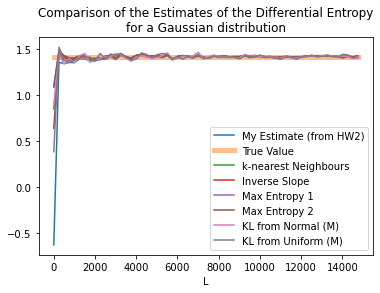

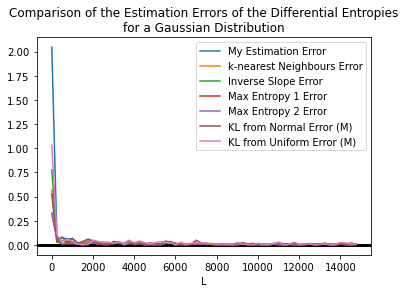

In [8]:
# VARYING THE LENGTH OF THE VECTOR

L_grid = np.arange(10,15000,250)
p=1
width = 0.1

true_h = true_diff_norm(p) # Invariant w.r.t. L

my_list = []
true_list = []
l1,l2,l3,l4,l5,l6 = [],[],[],[],[],[]

my_e = []
e1,e2,e3,e4,e5,e6 = [],[],[],[],[],[]

for L in L_grid:
    x = gen_norm(p, L)
    
    my_h = my_diff_entropy(x, width, plot=False, num_bins=False) # My estimation from HW2
    h1,h2,h3,h4,h5,h6 = diff_h(x) # ite Estimations
    
    my_list.append(my_h)
    true_list.append(true_h)
    l1.append(h1)
    l2.append(h2)
    l3.append(h3)
    l4.append(h4)
    l5.append(h5)
    l6.append(h6)
    
    my_e.append(np.absolute(my_h-true_h))
    e1.append(np.absolute(h1-true_h))
    e2.append(np.absolute(h2-true_h))
    e3.append(np.absolute(h3-true_h))
    e4.append(np.absolute(h4-true_h))
    e5.append(np.absolute(h5-true_h))
    e6.append(np.absolute(h6-true_h))
    
plt.figure()
plt.title('Comparison of the Estimates of the Differential Entropy\nfor a Gaussian distribution')
plt.xlabel('L')
plt.plot(L_grid, my_list, label='My Estimate (from HW2)')
plt.plot(L_grid, true_list, linewidth=5, alpha=0.5, label='True Value')
plt.plot(L_grid, l1, label='k-nearest Neighbours')
plt.plot(L_grid, l2, label='Inverse Slope')
plt.plot(L_grid, l3, label='Max Entropy 1')
plt.plot(L_grid, l4, label='Max Entropy 2')
plt.plot(L_grid, l5, label='KL from Normal (M)')
plt.plot(L_grid, l6, label='KL from Uniform (M)')
plt.legend()

plt.figure()
plt.title('Comparison of the Estimation Errors of the Differential Entropies\nfor a Gaussian Distribution')
plt.xlabel('L')
plt.axhline(y=0, linewidth=3, color='k')
plt.plot(L_grid, my_e, label='My Estimation Error')
plt.plot(L_grid, e1, label='k-nearest Neighbours Error')
plt.plot(L_grid, e2, label='Inverse Slope Error')
plt.plot(L_grid, e3, label='Max Entropy 1 Error')
plt.plot(L_grid, e4, label='Max Entropy 2 Error')
plt.plot(L_grid, e5, label='KL from Normal Error (M)')
plt.plot(L_grid, e6, label='KL from Uniform Error (M)')
plt.legend()

## Estimations for an Exponential

### Key Questions:
+ Why **Max Entropy 1 and 2** (estimation criteria) perform so bad for the exponential? (Look at what the criterion looks like and find a reason).

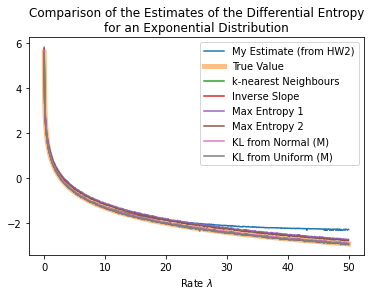

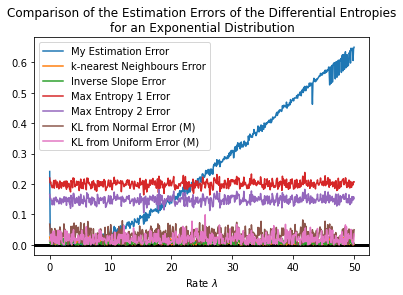

In [9]:
# VARYING THE RATE lambda

lambda_grid = np.linspace(0.01,50,600)
L = 10000
width = 0.1

my_list = []
true_list = []
l1,l2,l3,l4,l5,l6 = [],[],[],[],[],[]

my_e = []
e1,e2,e3,e4,e5,e6 = [],[],[],[],[],[]

for lam in lambda_grid:
    x = gen_exp(lam, L)
    
    my_h = my_diff_entropy(x, width, plot=False, num_bins=False) # My estimation from HW2
    true_h = true_diff_exp(lam)
    h1,h2,h3,h4,h5,h6 = diff_h(x) # ite Estimations
    
    my_list.append(my_h)
    true_list.append(true_h)
    l1.append(h1)
    l2.append(h2)
    l3.append(h3)
    l4.append(h4)
    l5.append(h5)
    l6.append(h6)
    
    my_e.append(np.absolute(my_h-true_h))
    e1.append(np.absolute(h1-true_h))
    e2.append(np.absolute(h2-true_h))
    e3.append(np.absolute(h3-true_h))
    e4.append(np.absolute(h4-true_h))
    e5.append(np.absolute(h5-true_h))
    e6.append(np.absolute(h6-true_h))
    
plt.figure()
plt.title('Comparison of the Estimates of the Differential Entropy\nfor an Exponential Distribution')
plt.xlabel('Rate $\lambda$')
plt.plot(lambda_grid, my_list, label='My Estimate (from HW2)')
plt.plot(lambda_grid, true_list,linewidth=5, alpha=0.5, label='True Value')
plt.plot(lambda_grid, l1, label='k-nearest Neighbours')
plt.plot(lambda_grid, l2, label='Inverse Slope')
plt.plot(lambda_grid, l3, label='Max Entropy 1')
plt.plot(lambda_grid, l4, label='Max Entropy 2')
plt.plot(lambda_grid, l5, label='KL from Normal (M)')
plt.plot(lambda_grid, l6, label='KL from Uniform (M)')
plt.legend()

plt.figure()
plt.title('Comparison of the Estimation Errors of the Differential Entropies\nfor an Exponential Distribution')
plt.xlabel('Rate $\lambda$')
plt.axhline(y=0, linewidth=3, color='k')
plt.plot(lambda_grid, my_e, label='My Estimation Error')
plt.plot(lambda_grid, e1, label='k-nearest Neighbours Error')
plt.plot(lambda_grid, e2, label='Inverse Slope Error')
plt.plot(lambda_grid, e3, label='Max Entropy 1 Error')
plt.plot(lambda_grid, e4, label='Max Entropy 2 Error')
plt.plot(lambda_grid, e5, label='KL from Normal Error (M)')
plt.plot(lambda_grid, e6, label='KL from Uniform Error (M)')
plt.legend()

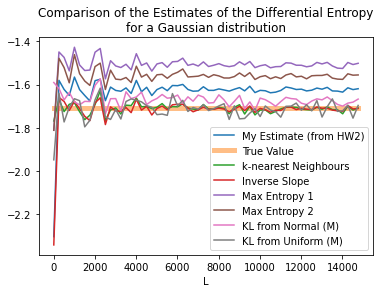

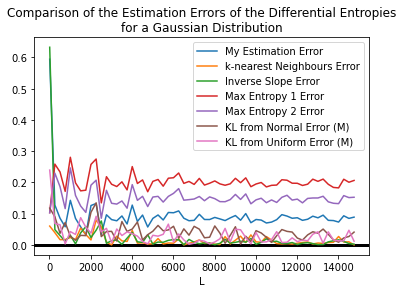

In [10]:
# VARYING THE LENGTH OF THE VECTOR

L_grid = np.arange(10,15000,250)
lam=15
width = 0.1

true_h = true_diff_exp(lam) # Invariant w.r.t. L

my_list = []
true_list = []
l1,l2,l3,l4,l5,l6 = [],[],[],[],[],[]

my_e = []
e1,e2,e3,e4,e5,e6 = [],[],[],[],[],[]

for L in L_grid:
    x = gen_exp(lam, L)
    
    my_h = my_diff_entropy(x, width, plot=False, num_bins=False) # My estimation from HW2
    h1,h2,h3,h4,h5,h6 = diff_h(x) # ite Estimations
    
    my_list.append(my_h)
    true_list.append(true_h)
    l1.append(h1)
    l2.append(h2)
    l3.append(h3)
    l4.append(h4)
    l5.append(h5)
    l6.append(h6)
    
    my_e.append(np.absolute(my_h-true_h))
    e1.append(np.absolute(h1-true_h))
    e2.append(np.absolute(h2-true_h))
    e3.append(np.absolute(h3-true_h))
    e4.append(np.absolute(h4-true_h))
    e5.append(np.absolute(h5-true_h))
    e6.append(np.absolute(h6-true_h))
    
plt.figure()
plt.title('Comparison of the Estimates of the Differential Entropy\nfor a Gaussian distribution')
plt.xlabel('L')
plt.plot(L_grid, my_list, label='My Estimate (from HW2)')
plt.plot(L_grid, true_list, linewidth=5, alpha=0.5, label='True Value')
plt.plot(L_grid, l1, label='k-nearest Neighbours')
plt.plot(L_grid, l2, label='Inverse Slope')
plt.plot(L_grid, l3, label='Max Entropy 1')
plt.plot(L_grid, l4, label='Max Entropy 2')
plt.plot(L_grid, l5, label='KL from Normal (M)')
plt.plot(L_grid, l6, label='KL from Uniform (M)')
plt.legend()

plt.figure()
plt.title('Comparison of the Estimation Errors of the Differential Entropies\nfor a Gaussian Distribution')
plt.xlabel('L')
plt.axhline(y=0, linewidth=3, color='k')
plt.plot(L_grid, my_e, label='My Estimation Error')
plt.plot(L_grid, e1, label='k-nearest Neighbours Error')
plt.plot(L_grid, e2, label='Inverse Slope Error')
plt.plot(L_grid, e3, label='Max Entropy 1 Error')
plt.plot(L_grid, e4, label='Max Entropy 2 Error')
plt.plot(L_grid, e5, label='KL from Normal Error (M)')
plt.plot(L_grid, e6, label='KL from Uniform Error (M)')
plt.legend()

# TODO 3
Using the ITE toolbox, design and implement a procedure that starting from two arbitrarily long lists of realizations for two continuous random variables x and y provides estimates of:

+ The joint and conditional differential entropies, $h(x,y)$ and $h(x|y)$, respectively.
+ The cross-entropy and the Kullback-Leibler divergence, $D(p_x||p_y)$.
+ The mutual information, $I(x;y)$.

Note that your procedure should not assume any prior information on the statistics of x and y.

Moreover, ITE could provide different types of estimators for a given metric. Therefore, (when possible) consider the different allowed approaches.

In [11]:
y1 = np.random.randn(1000, 3)
print(y1.shape)

(1000, 3)


In [12]:
# FUNCTIONS TO COMPUTE THE ESTIMATIONS

def conditional_h(x, y):
    co = ite.cost.BcondHShannon_HShannon() # Conditional Entropy Estimator
    
    # Massage x and y to make them "ite friendly"
    x, y = x.reshape((-1,1)), y.reshape((-1,1))
    xy = np.hstack((x,y))
    
    # Estimation
#     h_cond = co.estimation(xy, 1)
    h_cond = co.estimation(xy, 1)
    
    return h_cond

def joint_h(x, y):
#     # There is no an actual built-in estimator for this one
#     hy = diff_h(y)[1]
#     h_cond = conditional_h(x, y)
#     joint_h = h_cond + hy # This one becomes a "Meta" Estimator (namely based on other ones).
    
    # This seems to work
    co1 = ite.cost.BHShannon_KnnK()
    
    h = co1.estimation(np.hstack((x,y)))
    
    return h

def relative_h(x, y):
    x, y = x.reshape((-1,1)), y.reshape((-1,1))
    print(f'###{x.shape}, {y.shape}')
    # Base Estimators
    co1 = ite.cost.BDKL_KnnK() # k_nearest Neighbours
    co2 = ite.cost.BDKL_KnnKiTi() # k_nearest Neighbours
    # Meta Estimators
    co3 = ite.cost.MDKL_HSCE() # = Cross Entropy - Entropy
    
    D1 = co1.estimation(x,y)
    D2 = co2.estimation(x,y)
    D3 = co3.estimation(x,y)
    
    return D1, D2, D3

def mutual_I(x, y):
    ds = np.array([1,1]) # Array containing the dimensions of x and y.
    
    x, y = x.reshape((-1,1)), y.reshape((-1,1))
    xy = np.hstack((x,y))
    
    # For the Mutual Info we have only Meta Estimators!
    co1 = ite.cost.MIShannon_DKL() # KL-divergence of joint & product of marginals
    co2 = ite.cost.MIShannon_HS() # Entropy sum of components minus joint entropy
    
    i1 = co1.estimation(xy, ds)
    i2 = co2.estimation(xy, ds)
    
    return i1, i2

In [13]:
# Just experiment delete this
#conditional
from numpy import dot
from numpy.random import rand, multivariate_normal
dim1, dim2 = 1, 2
dim = dim1 + dim2
t = 5000
co = ite.cost.BcondHShannon_HShannon()
m, l = rand(dim), rand(dim, dim)
c = dot(l, l.T)
y = multivariate_normal(m, c, t)
cond_h = co.estimation(y, dim1)
print(y.shape, dim1)

from numpy.random import randn
co = ite.cost.BDKL_KnnK()
dim = 3
t1, t2 = 2000, 3000
y1 = randn(t1, dim)
y2 = randn(t2, dim)
d = co.estimation(y1, y2)
print(y1.shape, y2.shape)

from numpy.random import randn # we will use ’randn’ to create the observations
from numpy import array
 # an ’array’ will contain the subspace dimensions: [d1 ; d2 ; d3 ]
co = ite.cost.MIShannon_DKL() # initialize the mutual information estimator
# (MIShannon_DKL: 2nd character = ’I’)
ds = array([2, 3, 4])
t = 2000
y = randn(t, sum(ds))
i = co.estimation(y, ds)
print(y.shape)
print(np.hstack((y,y)).shape)

(5000, 3) 1
(2000, 3) (3000, 3)
(2000, 9)
(2000, 18)


## Estimations for x Gaussian and $y=ax+bz$ (z Uniform)

In [14]:
# FUNCTION TO GENERATE THE DESIRED GAUSSIAN DISTRIBUTIONS

def gen_normal_xy(mu1, sigma1, mu2, sigma2, a, b, L):
    x = np.random.normal(mu1, sigma1, (L,1))
    z = np.random.normal(mu2, sigma2, (L,1))
    y = a*x + b*z
    return x, y

In [15]:
# FUNCTIONS TO PERFORM MY ESTIMATIONS (FROM HW2)

def my_joint_pdf(x, y, width, return_marginals=False, bins_count=False):
    xedges = np.arange(x.min(), x.max(), step=width)
    yedges = np.arange(y.min(), y.max(), step=width)
    
    x = x.reshape((-1,))
    y = y.reshape((-1,))
    
#     hist_xy, xedges, yedges = np.histogram2d(x,y, bins=(xedges, yedges), density=True)
    hist_xy, xedges, yedges = np.histogram2d(x,y, 50, density=True) # Try without setting bin_edges
    
    return hist_xy

def my_joint_diff(x, y, width, bins_count=False):
    pxy = my_joint_pdf(x, y, width, bins_count=True)
    pxy = pxy.flatten()
    pxy = np.array(pxy[pxy != 0]) # Drop probs = 0, which would deform the result.
    ixy = np.log2(1/pxy)
    
    # Now the diff entropy is given as an inner product between px and diff_i
    hxy = np.inner(pxy, ixy) * width**2
    
    return hxy * np.log(2)

def my_cond_diff(x,y, width):
    hxy = my_joint_diff(x,y,width)
    hy = my_diff_entropy(y, width)
    hxy_cond = hxy - hy
    return hxy_cond

def my_relative_h(x,y,width):
    # Note that we must restrict the alphabet of y to the alphabet of x.
    # First of all we must set a common domain for x and y.
    minimum = min(x.min(), y.min())
    maximum = max(x.max(), y.max())
    # we now add minimum and maximum both to x and y. This doesn't change the statistics
    # but makes the r.ve.s have the same bin_edges
    x = np.append(x, [minimum, maximum])
    y = np.append(y, [minimum, maximum])
    #Now we can compute the pdfs
    px, _ = list(pdf(x,width))
    py, _ = list(pdf(y,width))
    # drop py where = 0 and the corresponding px
    non_zero = []
    for n, sample in enumerate(px):
#     for n, sample in enumerate(py):    
        if sample != 0:
            non_zero.append(n)
    px = np.asarray(px[non_zero])
    py = np.asarray(py[non_zero])
    
    arg = np.divide(px, py) # argument of the log in the definition
    rel_h = np.inner(px, np.log2(arg))
    return rel_h

def my_mutual_info(x,y,width):
    hx = my_diff_entropy(x, width)
    hy = my_diff_entropy(y, width)
    hxy = my_joint_diff(x,y,width)
    mut_info = hx + hy - hxy
    return mut_info

def my_values(x,y,width, bins_count=False):
    hxy = my_joint_diff(x,y,width, bins_count=True)
    h_cond = my_cond_diff(x,y,width)
    D = my_relative_h(x,y,width)
    I = my_mutual_info(x,y,width)
    
    return hxy, h_cond, D, I

###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)


/tmp/ipykernel_5276/2280224776.py:53: RuntimeWarning: divide by zero encountered in true_divide
  arg = np.divide(px, py) # argument of the log in the definition


###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1), (10000, 1)
###(10000, 1

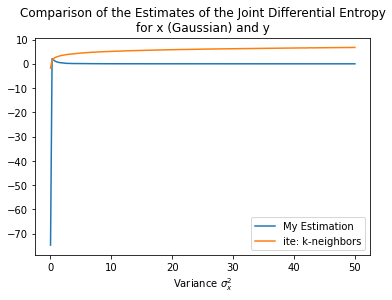

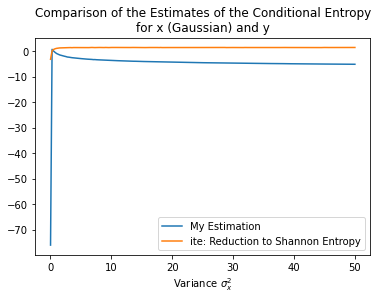

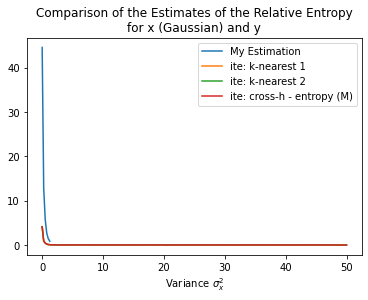

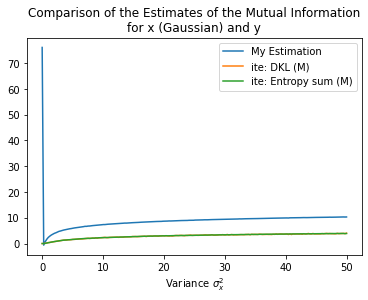

In [16]:
# VARYING THE VARIANCE OF x

sigma_grid = np.linspace(0.01,50,200)
mu1 = 0
mu2, s2 = 0, 1
a, b = 1, 1
L = 10000
width = 0.1

my_joint, my_cond, my_D, my_I = [], [], [], []
h_list, cond_list= [], []
D1_list, D2_list, D3_list = [], [], []
i1_list, i2_list = [], []

for s in sigma_grid:
    x, y = gen_normal_xy(mu1, s, mu2, s2, a, b, L)
    
    # For clarity the 4 quantities have a simplified notation
    my1, my2, my3, my4 = my_values(x, y, width)
    
    # Estimates from ite
    h, cond_h = joint_h(x, y), conditional_h(x, y)
    D1, D2, D3 = relative_h(x, y)
    i1, i2 = mutual_I(x, y)
    
    ###
    my_joint.append(my1)
    my_cond.append(my2)
    my_D.append(my3)
    my_I.append(my4)
    ###
    h_list.append(h)
    cond_list.append(cond_h)
    ###
    D1_list.append(D1)
    D2_list.append(D2)
    D3_list.append(D3)
    ###
    i1_list.append(i1)
    i2_list.append(i2)
    
plt.figure()
plt.title('Comparison of the Estimates of the Joint Differential Entropy\nfor x (Gaussian) and y') 
plt.xlabel('Variance $\sigma_x^2$')
plt.plot(sigma_grid, my_joint, label='My Estimation')
plt.plot(sigma_grid, h_list, label='ite: k-neighbors')
plt.legend()

plt.figure()
plt.title('Comparison of the Estimates of the Conditional Entropy\nfor x (Gaussian) and y')
plt.xlabel('Variance $\sigma_x^2$')
plt.plot(sigma_grid, my_cond, label='My Estimation')
plt.plot(sigma_grid, cond_list, label='ite: Reduction to Shannon Entropy')
plt.legend()

plt.figure()
plt.title('Comparison of the Estimates of the Relative Entropy\nfor x (Gaussian) and y')
plt.xlabel('Variance $\sigma_x^2$')
plt.plot(sigma_grid, my_D, label='My Estimation')
plt.plot(sigma_grid, D1_list, label='ite: k-nearest 1')
plt.plot(sigma_grid, D2_list, label='ite: k-nearest 2')
plt.plot(sigma_grid, D3_list, label='ite: cross-h - entropy (M)')
plt.legend()

plt.figure()
plt.title('Comparison of the Estimates of the Mutual Information\nfor x (Gaussian) and y')
plt.xlabel('Variance $\sigma_x^2$')
plt.plot(sigma_grid, my_I, label='My Estimation')
plt.plot(sigma_grid, i1_list, label='ite: DKL (M)')
plt.plot(sigma_grid, i2_list, label='ite: Entropy sum (M)')
plt.legend()

**IMPORTANT OBSERVATION:**

The huge deviation from the ite estimation is probably due to the choice of the bins for the 2d histogram.

The estimation has already been improved by choosing the number of bins instead of the width, but could been improved further by considering an adaptive number of bins.

/tmp/ipykernel_5276/2280224776.py:53: RuntimeWarning: divide by zero encountered in true_divide
  arg = np.divide(px, py) # argument of the log in the definition


###(250, 1), (250, 1)
###(850, 1), (850, 1)
###(1450, 1), (1450, 1)
###(2050, 1), (2050, 1)
###(2650, 1), (2650, 1)
###(3250, 1), (3250, 1)
###(3850, 1), (3850, 1)
###(4450, 1), (4450, 1)
###(5050, 1), (5050, 1)
###(5650, 1), (5650, 1)
###(6250, 1), (6250, 1)
###(6850, 1), (6850, 1)
###(7450, 1), (7450, 1)
###(8050, 1), (8050, 1)
###(8650, 1), (8650, 1)
###(9250, 1), (9250, 1)
###(9850, 1), (9850, 1)
###(10450, 1), (10450, 1)
###(11050, 1), (11050, 1)
###(11650, 1), (11650, 1)
###(12250, 1), (12250, 1)
###(12850, 1), (12850, 1)
###(13450, 1), (13450, 1)
###(14050, 1), (14050, 1)
###(14650, 1), (14650, 1)
###(15250, 1), (15250, 1)
###(15850, 1), (15850, 1)
###(16450, 1), (16450, 1)
###(17050, 1), (17050, 1)
###(17650, 1), (17650, 1)
###(18250, 1), (18250, 1)
###(18850, 1), (18850, 1)
###(19450, 1), (19450, 1)


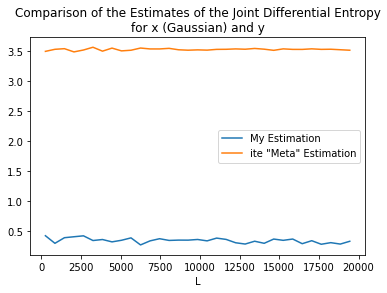

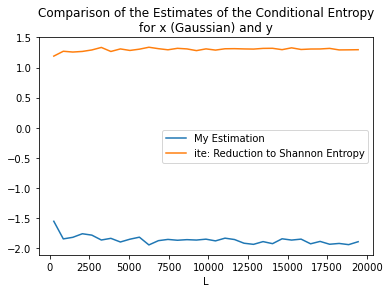

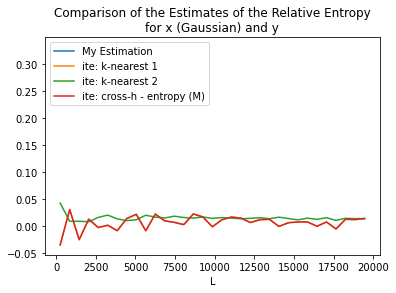

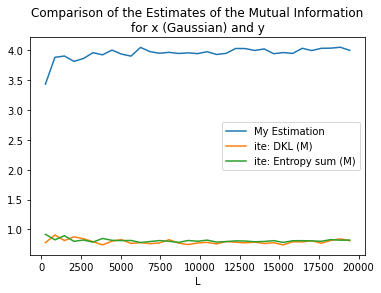

In [17]:
# VARYING THE LENGTH OF THE VECTOR x

L_grid = np.arange(250,20000,600)
mu1, s1 = 0, 2
mu2, s2 = 0, 1
a, b = 1, 1
width = 0.1

my_joint, my_cond, my_D, my_I = [], [], [], []
h_list, cond_list= [], []
D1_list, D2_list, D3_list = [], [], []
i1_list, i2_list = [], []

for L in L_grid:
    x, y = gen_normal_xy(mu1, s1, mu2, s2, a, b, L)
    
    # For clarity the 4 quantities have a simplified notation
    my1, my2, my3, my4 = my_values(x, y, width)
    
    # Estimates from ite
    h, cond_h = joint_h(x, y), conditional_h(x, y)
    D1, D2, D3 = relative_h(x, y)
    i1, i2 = mutual_I(x, y)
    
    ###
    my_joint.append(my1)
    my_cond.append(my2)
    my_D.append(my3)
    my_I.append(my4)
    ###
    h_list.append(h)
    cond_list.append(cond_h)
    ###
    D1_list.append(D1)
    D2_list.append(D2)
    D3_list.append(D3)
    ###
    i1_list.append(i1)
    i2_list.append(i2)
    
plt.figure()
plt.title('Comparison of the Estimates of the Joint Differential Entropy\nfor x (Gaussian) and y') 
plt.xlabel('L')
plt.plot(L_grid, my_joint, label='My Estimation')
plt.plot(L_grid, h_list, label='ite "Meta" Estimation')
plt.legend()

plt.figure()
plt.title('Comparison of the Estimates of the Conditional Entropy\nfor x (Gaussian) and y')
plt.xlabel('L')
plt.plot(L_grid, my_cond, label='My Estimation')
plt.plot(L_grid, cond_list, label='ite: Reduction to Shannon Entropy')
plt.legend()

plt.figure()
plt.title('Comparison of the Estimates of the Relative Entropy\nfor x (Gaussian) and y')
plt.xlabel('L')
plt.plot(L_grid, my_D, label='My Estimation')
plt.plot(L_grid, D1_list, label='ite: k-nearest 1')
plt.plot(L_grid, D2_list, label='ite: k-nearest 2')
plt.plot(L_grid, D3_list, label='ite: cross-h - entropy (M)')
plt.legend()

plt.figure()
plt.title('Comparison of the Estimates of the Mutual Information\nfor x (Gaussian) and y')
plt.xlabel('L')
plt.plot(L_grid, my_I, label='My Estimation')
plt.plot(L_grid, i1_list, label='ite: DKL (M)')
plt.plot(L_grid, i2_list, label='ite: Entropy sum (M)')
plt.legend()

In [18]:
import scipy.io # To read .mat files

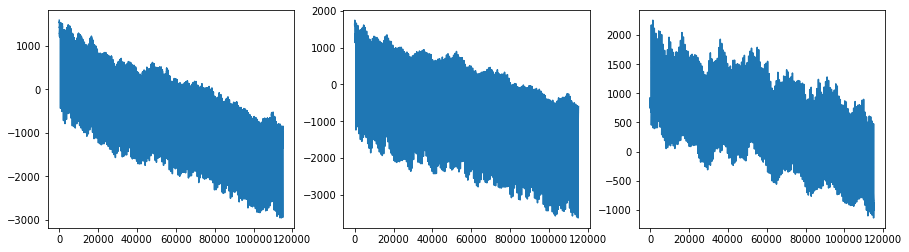

In [19]:
# Read the files
mat7 = scipy.io.loadmat('sigCh_7.mat')
mat8 = scipy.io.loadmat('sigCh_8.mat')
mat12 = scipy.io.loadmat('sigCh_12.mat')

# Extract array of samples
x7 = mat7['sigCh_7'].reshape((-1,1))
x8 = mat8['sigCh_8'].reshape((-1,1))
x12 = mat12['sigCh_12'].reshape((-1,1))

# Divide by 1000??? # Doesn't change anything
# x7 = x7/1000
# x8 = x8/1000
# x12 = x12/1000

# # Subtract the mean to have 0-mean vectors
# x7 = x7 - np.mean(x7)
# x8 = x8 - np.mean(x8)
# x12 = x12 - np.mean(x12)

# # Normalization
# print(np.std(x7))
# x7 = x7/np.std(x7)
# x8 = x8/np.std(x8)
# x12 = x12/np.std(x12)

# plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.plot(x7)
ax2.plot(x8)
ax3.plot(x12)
# fig.set_figheight(15)
fig.set_figwidth(15)

In [20]:
print(mat7)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon May 23 17:28:59 2022', '__version__': '1.0', '__globals__': [], 'sigCh_7': array([[1596, 1565, 1553, ..., -906, -894, -873]], dtype=int16)}


In [21]:
print(x7.shape, x8.shape, x12.shape)
print(type(x7))
uni7, count7 = np.unique(x7, return_counts=True)
uni8, count8 = np.unique(x8, return_counts=True)
uni12, count12 = np.unique(x12, return_counts=True)
print(f'###7: {uni7}, {count7}')
print(f'###8: {uni8}, {count8}')
print(f'###12: {uni12}, {count12}')
# hist7, bin7 = np.histogram(x7, bins=40)
# hist8, bin8 = np.histogram(x8, bins=40)
# hist12, bin12 = np.histogram(x12, bins=40)
# plt.figure()
# plt.hist(x7, bins = 50)
# plt.figure()
# plt.hist(x8, bins=50)
# plt.figure()
# plt.hist(x12, bins=50)

(115200, 1) (115200, 1) (115200, 1)
<class 'numpy.ndarray'>
###7: [-2963 -2960 -2959 ...  1580  1581  1596], [1 1 1 ... 2 1 1]
###8: [-3630 -3627 -3614 ...  1737  1738  1744], [1 1 1 ... 2 1 1]
###12: [-1136 -1129 -1128 ...  2244  2250  2253], [1 1 2 ... 1 1 1]


510244.24780830415
3.9020585275897677 3.515309146553205 3.982213755951749 3.9900622418101532 3.7468039665012642 3.4799675996501214
-inf 6.401729479172553 6.201005793149913 6.115749827560155 -inf -inf
-inf 6.467312652632295 6.210716692407479 6.14030505702362 -inf -inf


/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/base_h.py:70: RuntimeWarning: divide by zero encountered in log
  dim * sum(log(distances_yy[:, self.k-1])) / num_of_samples
/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/base_d.py:83: RuntimeWarning: divide by zero encountered in true_divide
  d = dim * mean(log(distances_y2y1[:, -1] /


-inf 6.5492230559437274 6.338853028790826 6.256447824070826 -inf -inf
-inf 6.735266071393282 6.660970153115113 6.533144127599721 -inf -inf
-inf 6.763232508908623 6.692153523573664 6.570976871088547 -inf -inf
-inf 6.894657175855049 6.874294256870476 6.771587871404174 -inf -inf
-inf 6.880875337084503 6.833503733668324 6.748709959634691 -inf -inf
-inf 6.949561008611088 6.924160776690657 6.850888894431982 -inf -inf
-inf 7.066457055145108 7.088091767760164 7.01802746138228 -inf -inf
-inf 7.103444121137858 7.176597730640587 7.104395237118991 -inf -inf
-inf 7.165386396692126 7.259390522716563 7.190336800468183 -inf -inf
-inf 7.2661386509246535 7.352741700790885 7.30523163139544 -inf -inf
-inf 7.294632078664544 7.403112795786694 7.355709111936511 -inf -inf
-inf 7.310062333988873 7.442127512128203 7.397515583456984 -inf -inf
-inf 7.309104267821987 7.466647254513382 7.424436969284392 -inf -inf
-inf 7.337373384956627 7.49617830808458 7.457954697410041 -inf -inf
-inf 7.406438523625027 7.5350651095

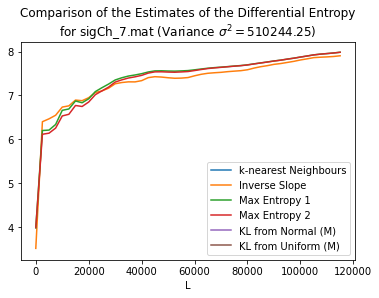

In [22]:
# VARYING THE LENGTH OF THE VECTOR x7

L_grid = np.arange(10,x7.shape[0],2500)

# true_h = diff_h(x7) 

l1,l2,l3,l4,l5,l6 = [],[],[],[],[],[]
print(np.var(x7))

for L in L_grid:
    x = x7[:L,:]
    
    h1,h2,h3,h4,h5,h6 = diff_h(x) # ite Estimations
    print(h1,h2,h3,h4,h5,h6)
    
    l1.append(h1)
    l2.append(h2)
    l3.append(h3)
    l4.append(h4)
    l5.append(h5)
    l6.append(h6)
    
plt.figure()
plt.title(f'Comparison of the Estimates of the Differential Entropy\nfor sigCh_7.mat (Variance $\sigma^2={np.var(x7):.2f}$)')  
plt.xlabel('L')
plt.plot(L_grid, l1, label='k-nearest Neighbours')
plt.plot(L_grid, l2, label='Inverse Slope')
plt.plot(L_grid, l3, label='Max Entropy 1')
plt.plot(L_grid, l4, label='Max Entropy 2')
plt.plot(L_grid, l5, label='KL from Normal (M)')
plt.plot(L_grid, l6, label='KL from Uniform (M)')
plt.legend()

568308.809442665
3.0020965935237145 3.029663246826636 3.4933646531368034 3.5201106522480003 3.667620617231533 3.094107862715454
-inf 6.806387929943023 6.609512481407748 6.601993002399164 -inf -inf
-inf 6.821198247588639 6.559632197931128 6.59124046388434 -inf -inf
-inf 6.95801808997483 6.705264696702707 6.704206530267569 -inf -inf
-inf 7.091329368808723 6.9919162583595815 6.897763420600416 -inf -inf


/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/base_h.py:70: RuntimeWarning: divide by zero encountered in log
  dim * sum(log(distances_yy[:, self.k-1])) / num_of_samples
/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/base_d.py:83: RuntimeWarning: divide by zero encountered in true_divide
  d = dim * mean(log(distances_y2y1[:, -1] /


-inf 7.075456266922625 7.030414494612612 6.9130352462034415 -inf -inf
-inf 7.127838244637641 7.091781393487437 6.983134548134827 -inf -inf
-inf 7.1051448856634005 7.015143617537363 6.93277211336806 -inf -inf
-inf 7.117201694239749 7.0209775623250765 6.950045968935258 -inf -inf
-inf 7.199813087403943 7.104478704596401 7.044719144757112 -inf -inf
-inf 7.227306388716164 7.1564320552300815 7.089793005343065 -inf -inf
-inf 7.28266576026016 7.240738304003092 7.170111717956224 -inf -inf
-inf 7.353714476615808 7.332615921335639 7.261325507329347 -inf -inf
-inf 7.363403847837838 7.370483205091774 7.290635697607009 -inf -inf
-inf 7.351774898021616 7.3697071339036535 7.284747963705929 -inf -inf
-inf 7.335238560141209 7.369331173632852 7.28063004920093 -inf -inf
-inf 7.343650383025733 7.384459044974037 7.294822271841033 -inf -inf
-inf 7.395555069578718 7.426377099845336 7.345393853026793 -inf -inf
-inf 7.418801362288628 7.453069983186767 7.377581700946336 -inf -inf
-inf 7.417109637718491 7.4524187

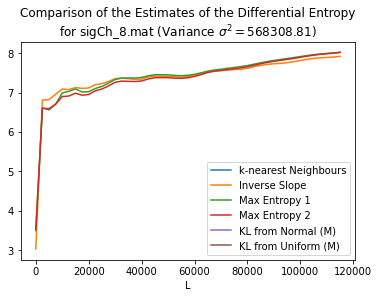

In [23]:
# VARYING THE LENGTH OF THE VECTOR x8

L_grid = np.arange(10,x8.shape[0],2500)

# true_h = diff_h(x7) 
print(np.var(x8))

l1,l2,l3,l4,l5,l6 = [],[],[],[],[],[]

for L in L_grid:
    x = x8[:L,:]
    
    h1,h2,h3,h4,h5,h6 = diff_h(x) # ite Estimations
    print(h1,h2,h3,h4,h5,h6)
    
    l1.append(h1)
    l2.append(h2)
    l3.append(h3)
    l4.append(h4)
    l5.append(h5)
    l6.append(h6)
    
plt.figure()
plt.title(f'Comparison of the Estimates of the Differential Entropy\nfor sigCh_8.mat (Variance $\sigma^2={np.var(x8):.2f}$)')
plt.xlabel('L')
plt.plot(L_grid, l1, label='k-nearest Neighbours')
plt.plot(L_grid, l2, label='Inverse Slope')
plt.plot(L_grid, l3, label='Max Entropy 1')
plt.plot(L_grid, l4, label='Max Entropy 2')
plt.plot(L_grid, l5, label='KL from Normal (M)')
plt.plot(L_grid, l6, label='KL from Uniform (M)')
plt.legend()

208048.01860654468
3.2254558156744237 3.1343986065221707 3.5967824321289568 3.5918380313039497 3.1983556184309063 2.9977361934497777
-inf 6.188382745764247 5.9463781705615695 5.81269189976826 -inf -inf
-inf 6.061680005986746 5.693754963297585 5.617846045738524 -inf -inf
-inf 6.366227940091311 6.200502626228809 6.151053192305559 -inf -inf
-inf 6.6379781150770505 6.8274583185640525 6.7608974952455885 -inf -inf


/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/base_h.py:70: RuntimeWarning: divide by zero encountered in log
  dim * sum(log(distances_yy[:, self.k-1])) / num_of_samples
/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/base_d.py:83: RuntimeWarning: divide by zero encountered in true_divide
  d = dim * mean(log(distances_y2y1[:, -1] /


-inf 6.622878639788526 6.92361750224212 6.826701178642713 -inf -inf
-inf 6.591027069361328 6.893747306987461 6.781953428483588 -inf -inf
-inf 6.593782899000985 6.797976107709925 6.672482546804705 -inf -inf
-inf 6.5532910584365345 6.721567776317576 6.590566060985218 -inf -inf
-inf 6.5181996231283925 6.691461742341824 6.561864863398767 -inf -inf
-inf 6.540116257448343 6.679941120519908 6.562478651184874 -inf -inf
-inf 6.70252288293736 6.808119896523421 6.755700685649096 -inf -inf
-inf 6.82012225227337 6.9281024411285745 6.932636105684578 -inf -inf
-inf 6.866060584900188 6.991927011148622 7.011065033095114 -inf -inf
-inf 6.864796482550891 6.957778389360444 6.973631947455064 -inf -inf
-inf 6.8492346630929 6.917127015793391 6.930753007733189 -inf -inf
-inf 6.817498389153783 6.872126958221124 6.889530109106074 -inf -inf
-inf 6.838636638721234 6.888962659434006 6.907288491831329 -inf -inf
-inf 6.8518556529545185 6.920922306139694 6.937768952575395 -inf -inf
-inf 6.854802650519511 6.9106935402

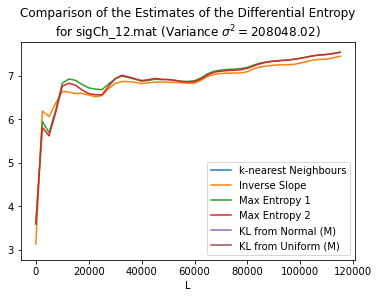

In [24]:
# VARYING THE LENGTH OF THE VECTOR x12

L_grid = np.arange(10,x12.shape[0],2500)

print(np.var(x12))

l1,l2,l3,l4,l5,l6 = [],[],[],[],[],[]

for L in L_grid:
    x = x12[:L,:]
    
    h1,h2,h3,h4,h5,h6 = diff_h(x) # ite Estimations
    print(h1,h2,h3,h4,h5,h6)
    
    l1.append(h1)
    l2.append(h2)
    l3.append(h3)
    l4.append(h4)
    l5.append(h5)
    l6.append(h6)
    
plt.figure()
plt.title(f'Comparison of the Estimates of the Differential Entropy\nfor sigCh_12.mat (Variance $\sigma^2={np.var(x12):.2f}$)')
plt.xlabel('L')
plt.plot(L_grid, l1, label='k-nearest Neighbours')
plt.plot(L_grid, l2, label='Inverse Slope')
plt.plot(L_grid, l3, label='Max Entropy 1')
plt.plot(L_grid, l4, label='Max Entropy 2')
plt.plot(L_grid, l5, label='KL from Normal (M)')
plt.plot(L_grid, l6, label='KL from Uniform (M)')
plt.legend()

In [25]:
print(x7.shape, x8.shape, x12.shape)
print(joint_h(x7, x8))

(115200, 1) (115200, 1) (115200, 1)
-inf


/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/base_h.py:70: RuntimeWarning: divide by zero encountered in log
  dim * sum(log(distances_yy[:, self.k-1])) / num_of_samples


/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/meta_h_cond.py:86: RuntimeWarning: invalid value encountered in double_scalars
  cond_h = h12 - h2
/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/base_d.py:83: RuntimeWarning: divide by zero encountered in true_divide
  d = dim * mean(log(distances_y2y1[:, -1] /
/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/base_d.py:83: RuntimeWarning: invalid value encountered in true_divide
  d = dim * mean(log(distances_y2y1[:, -1] /
/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/base_d.py:83: RuntimeWarning: divide by zero encountered in log
  d = dim * mean(log(distances_y2y1[:, -1] /
/home/tbergh98/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/tbergh98/Documenti/Università/Information Theory/I

###(2500, 1), (2500, 1)


/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/meta_d.py:1109: RuntimeWarning: invalid value encountered in double_scalars
  d = c - h
/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/meta_i.py:751: RuntimeWarning: invalid value encountered in double_scalars
  i += self.shannon_co.estimation(y[:, idx_start:idx_stop])


nan 0.45176851167396037 nan
###(7500, 1), (7500, 1)
nan 0.33468619073469713 nan
###(12500, 1), (12500, 1)
nan 0.2951578196846409 nan
###(17500, 1), (17500, 1)
nan 0.19726102780600394 nan
###(22500, 1), (22500, 1)
nan 0.14421883711762828 nan
###(27500, 1), (27500, 1)
nan 0.1310031544921379 nan
###(32500, 1), (32500, 1)
nan 0.09050209485504898 nan
###(37500, 1), (37500, 1)
nan 0.09376773141909837 nan
###(42500, 1), (42500, 1)
nan 0.0921554153236328 nan
###(47500, 1), (47500, 1)
nan 0.07236426231917782 nan
###(52500, 1), (52500, 1)
nan 0.09369292198443215 nan
###(57500, 1), (57500, 1)
nan 0.1257119663611001 nan
###(62500, 1), (62500, 1)
nan 0.12029079900460414 nan
###(67500, 1), (67500, 1)
nan 0.11561438549097282 nan
###(72500, 1), (72500, 1)
nan 0.09280865221137524 nan
###(77500, 1), (77500, 1)
nan 0.08539884824235336 nan
###(82500, 1), (82500, 1)
nan 0.07995261875764323 nan
###(87500, 1), (87500, 1)
nan 0.0720239457566754 nan
###(92500, 1), (92500, 1)
nan 0.060364482061432606 nan
###(97

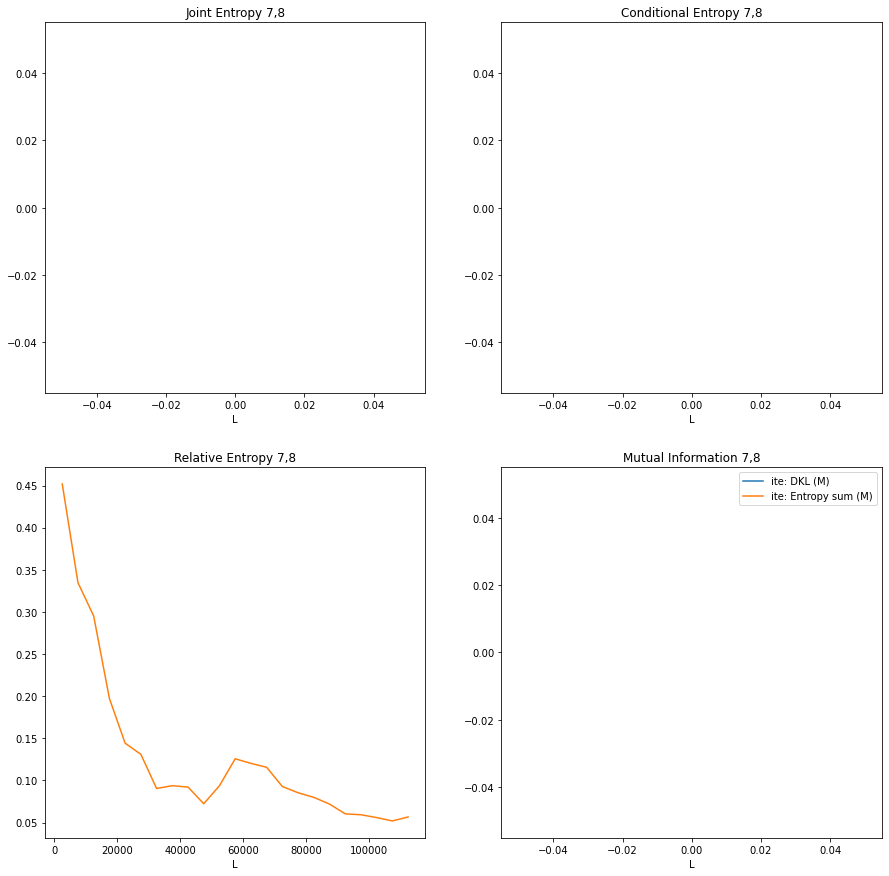

In [26]:
# JOINT QUANTITIES FOR x7, x8

L_grid = np.arange(2500,x7.shape[0],5000)

h_list, cond_list= [], []
D1_list, D2_list, D3_list = [], [], []
i1_list, i2_list = [], []

for L in L_grid:
    # Estimates from ite
    h, cond_h = joint_h(x7[:L,:], x8[:L,:]), conditional_h(x7[:L,:], x8[:L,:])
    D1, D2, D3 = relative_h(x7[:L,:], x8[:L,:])
    i1, i2 = mutual_I(x7[:L,:], x8[:L,:])
    print(D1, D2, D3)
    
    ###
    h_list.append(h)
    cond_list.append(cond_h)
    ###
    D1_list.append(D1)
    D2_list.append(D2)
    D3_list.append(D3)
    ###
    i1_list.append(i1)
    i2_list.append(i2)
    
fig, axs = plt.subplots(2,2)
axs[0,0].set_title('Joint Entropy 7,8')
axs[0,0].set(xlabel='L')
axs[0,0].plot(L_grid, h_list)

axs[0,1].set_title('Conditional Entropy 7,8')
axs[0,1].set(xlabel='L')
axs[0,1].plot(L_grid, cond_list)

axs[1,0].set_title('Relative Entropy 7,8')
axs[1,0].set(xlabel='L')
axs[1,0].plot(L_grid, D1_list, label='ite: k-nearest 1')
axs[1,0].plot(L_grid, D2_list, label='ite: k-nearest 2')
axs[1,0].plot(L_grid, D3_list, label='ite: cross-h - entropy (M)')

axs[1,1].set_title('Mutual Information 7,8')
axs[1,1].set(xlabel='L')
axs[1,1].plot(L_grid, i1_list, label='ite: DKL (M)')
axs[1,1].plot(L_grid, i2_list, label='ite: Entropy sum (M)')

fig.set_figheight(15)
fig.set_figwidth(15)

plt.legend()

(2500, 1) (2500, 1)
###(2500, 1), (2500, 1)
11.82617694842738 inf nan -inf
(3700, 1) (3700, 1)
###(3700, 1), (3700, 1)
11.904708193718239 inf nan -inf
(4900, 1) (4900, 1)


/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/base_h.py:70: RuntimeWarning: divide by zero encountered in log
  dim * sum(log(distances_yy[:, self.k-1])) / num_of_samples
/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/base_d.py:83: RuntimeWarning: divide by zero encountered in true_divide
  d = dim * mean(log(distances_y2y1[:, -1] /
/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/base_d.py:83: RuntimeWarning: divide by zero encountered in log
  d = dim * mean(log(distances_y2y1[:, -1] /
/home/tbergh98/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/base_c.py:64: RuntimeWarning: divide by zero encountered in log
  dim * mean(log(distances_y2y1[:, -1]))
/home/tbergh98/Documenti/Università/Infor

###(4900, 1), (4900, 1)
12.08944362508014 inf nan -inf
(6100, 1) (6100, 1)
###(6100, 1), (6100, 1)


/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/base_d.py:83: RuntimeWarning: invalid value encountered in true_divide
  d = dim * mean(log(distances_y2y1[:, -1] /


12.2143654838679 inf nan -inf
(7300, 1) (7300, 1)
###(7300, 1), (7300, 1)
12.360344053641562 inf nan -inf
(8500, 1) (8500, 1)
###(8500, 1), (8500, 1)
12.594099953870623 inf nan -inf
(9700, 1) (9700, 1)
###(9700, 1), (9700, 1)
12.68148856984139 inf nan -inf
(10900, 1) (10900, 1)
###(10900, 1), (10900, 1)


/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/meta_h_cond.py:86: RuntimeWarning: invalid value encountered in double_scalars
  cond_h = h12 - h2
/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/meta_i.py:751: RuntimeWarning: invalid value encountered in double_scalars
  i += self.shannon_co.estimation(y[:, idx_start:idx_stop])


-inf nan nan nan
(12100, 1) (12100, 1)
###(12100, 1), (12100, 1)
-inf nan nan nan
(13300, 1) (13300, 1)
###(13300, 1), (13300, 1)
-inf nan nan nan
(14500, 1) (14500, 1)
###(14500, 1), (14500, 1)
-inf nan nan nan
(15700, 1) (15700, 1)
###(15700, 1), (15700, 1)
-inf nan nan nan
(16900, 1) (16900, 1)
###(16900, 1), (16900, 1)
-inf nan nan nan
(18100, 1) (18100, 1)
###(18100, 1), (18100, 1)
-inf nan nan nan
(19300, 1) (19300, 1)
###(19300, 1), (19300, 1)
-inf nan nan nan
(20500, 1) (20500, 1)
###(20500, 1), (20500, 1)
-inf nan nan nan
(21700, 1) (21700, 1)
###(21700, 1), (21700, 1)
-inf nan nan nan
(22900, 1) (22900, 1)
###(22900, 1), (22900, 1)
-inf nan nan nan
(24100, 1) (24100, 1)
###(24100, 1), (24100, 1)
-inf nan nan nan
(25300, 1) (25300, 1)
###(25300, 1), (25300, 1)
-inf nan nan nan
(26500, 1) (26500, 1)
###(26500, 1), (26500, 1)
-inf nan nan nan
(27700, 1) (27700, 1)
###(27700, 1), (27700, 1)
-inf nan nan nan
(28900, 1) (28900, 1)
###(28900, 1), (28900, 1)
-inf nan nan nan
(30100, 

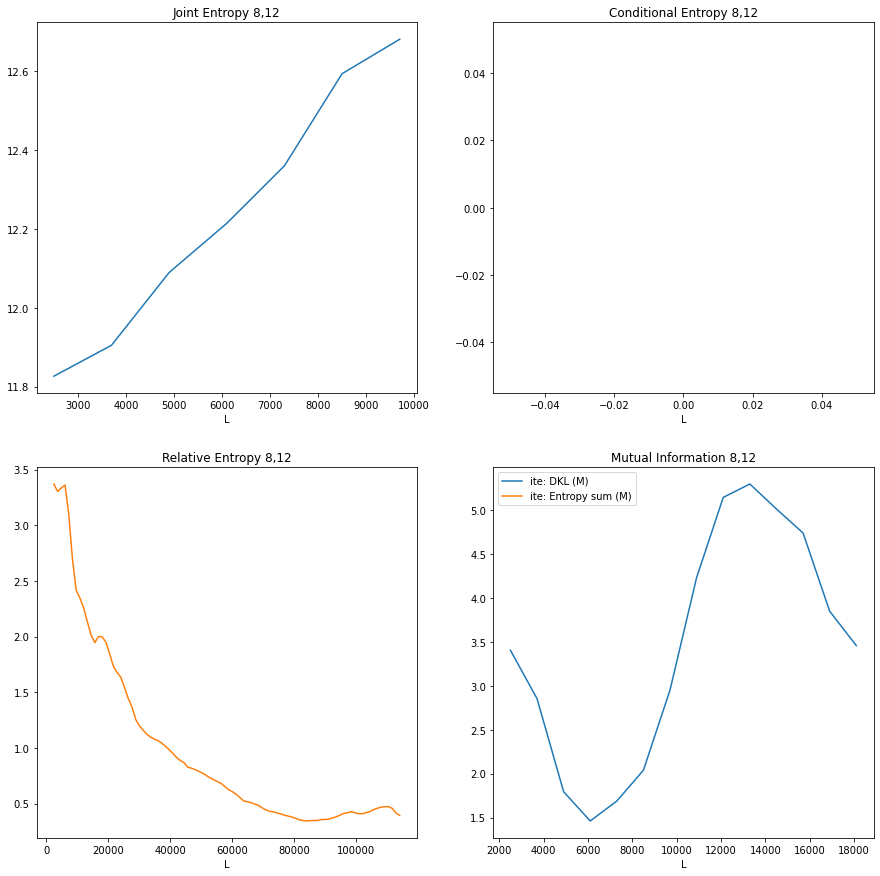

In [27]:
# JOINT QUANTITIES FOR x8, x12

L_grid = np.arange(2500,x7.shape[0],1200)

h_list, cond_list= [], []
D1_list, D2_list, D3_list = [], [], []
i1_list, i2_list = [], []

for L in L_grid:
    print(x8[:L,:].shape, x12[:L,:].shape)
    # Estimates from ite
    h, cond_h = joint_h(x8[:L,:], x12[:L,:]), conditional_h(x8[:L,:], x12[:L,:])
    D1, D2, D3 = relative_h(x8[:L,:], x12[:L,:])
    i1, i2 = mutual_I(x8[:L,:], x12[:L,:])
    print(h, cond_h, D1, i2)
    
    ###
    h_list.append(h)
    cond_list.append(cond_h)
    ###
    D1_list.append(D1)
    D2_list.append(D2)
    D3_list.append(D3)
    ###
    i1_list.append(i1)
    i2_list.append(i2)

fig, axs = plt.subplots(2,2)
# axs[0,0].set_title('Joint Entropy $h(x_8,x_{12})$')
axs[0,0].set_title('Joint Entropy 8,12')

axs[0,0].set(xlabel='L')
axs[0,0].plot(L_grid, h_list)

# axs[0,1].set_title('Conditional Entropy $h(x_8|x_{12})$')
axs[0,1].set_title('Conditional Entropy 8,12')
axs[0,1].set(xlabel='L')
axs[0,1].plot(L_grid, cond_list)

# axs[1,0].set_title('Relative Entropy $D(p_x_8||p_x_{12})$')
axs[1,0].set_title('Relative Entropy 8,12')
axs[1,0].set(xlabel='L')
axs[1,0].plot(L_grid, D1_list, label='ite: k-nearest 1')
axs[1,0].plot(L_grid, D2_list, label='ite: k-nearest 2')
axs[1,0].plot(L_grid, D3_list, label='ite: cross-h - entropy (M)')

# axs[1,1].set_title('Mutual Information $I(x_8;x_{12})$')
axs[1,1].set_title('Mutual Information 8,12')
axs[1,1].set(xlabel='L')
axs[1,1].plot(L_grid, i1_list, label='ite: DKL (M)')
axs[1,1].plot(L_grid, i2_list, label='ite: Entropy sum (M)')

fig.set_figheight(15)
fig.set_figwidth(15)

plt.legend()

# Entropy Rates

In [30]:
# Symbol Rate
F = 1000 # From documentation on ECG signals

# Entropy based on inverse slope priciple for every ECG signal
_,h7,_,_,_,_ = diff_h(x7) 
_,h8,_,_,_,_ = diff_h(x8)
_,h12,_,_,_,_ = diff_h(x12)

# Entropies per symbols
s7 = h7/x7.shape[0]
s8 = h8/x8.shape[0]
s12 = h12/x12.shape[0]

# Entropy rates
r7 = F*s7
r8 = F*s8
r12 = F*s12

print(f'Entropy rate of ECG7 is: {r7}')
print(f'Entropy rate of ECG8 is: {r8}')
print(f'Entropy rate of ECG12 is: {r12}')

/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/base_h.py:70: RuntimeWarning: divide by zero encountered in log
  dim * sum(log(distances_yy[:, self.k-1])) / num_of_samples
/home/tbergh98/Documenti/Università/Information Theory/ITE-1.1_code/ite/cost/base_d.py:83: RuntimeWarning: divide by zero encountered in true_divide
  d = dim * mean(log(distances_y2y1[:, -1] /


Entropy rate of ECG7 is: 0.06862320407067189
Entropy rate of ECG8 is: 0.06876534062756917
Entropy rate of ECG12 is: 0.06467448020801986
